In [2]:
library(ggplot2)
options(repr.plot.height=6,repr.plot.width=8)

Cargar los datos en un dataframe llamado: airbnb

In [3]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [4]:
head(airbnb)

Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [5]:
colnames(airbnb) <- c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
head(airbnb)

CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [6]:
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados * 0.092903
str(airbnb)

'data.frame':	13207 obs. of  14 variables:
 $ CodigoPostal   : Factor w/ 77 levels "","-","20013",..: 15 15 15 15 26 15 15 15 26 15 ...
 $ Barrio         : Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 115 ...
 $ TipoPropiedad  : Factor w/ 22 levels "Apartment","Bed & Breakfast",..: 1 1 1 16 1 1 15 1 1 1 ...
 $ TipoAlquiler   : Factor w/ 3 levels "Entire home/apt",..: 2 1 1 1 1 1 2 1 1 1 ...
 $ MaxOcupantes   : int  2 6 3 3 5 2 7 3 2 4 ...
 $ NumBanyos      : num  2 1 1 2 1 1 5 1 1 2 ...
 $ NumDormitorios : int  1 3 2 1 1 0 1 1 1 2 ...
 $ NumCamas       : int  1 5 2 1 1 1 7 NA 1 2 ...
 $ TipoCama       : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Comodidades    : Factor w/ 11073 levels "","Air conditioning,Breakfast,Washer,Essentials,Hair dryer",..: 9444 4020 3249 4039 8369 2047 961 7436 5618 7736 ...
 $ PiesCuadrados  : int  NA NA NA NA 538 NA NA NA 700 NA ...
 $ Precio         : int  35 92 55 60 75 55 60 70 90 155 ...
 $ Pun

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [7]:
airbnb$CodigoPostal
#primero veo qué tengo en la columna CodigoPostal y luego voy tratando los casos erróneos por separado.
airbnb$CodigoPostal[airbnb$CodigoPostal==''] <-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='-'] <-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='28'] <-NA
airbnb$CodigoPostal[grepl("^28002",airbnb$CodigoPostal)==TRUE] <-'28002'
airbnb$CodigoPostal[grepl("^28051",airbnb$CodigoPostal)==TRUE] <-'28051'
airbnb$CodigoPostal[grepl("^280013",airbnb$CodigoPostal)==TRUE] <-'28013'
airbnb$CodigoPostal[grepl("^2015",airbnb$CodigoPostal)==TRUE] <-'28015'
airbnb$CodigoPostal[grepl("^2815",airbnb$CodigoPostal)==TRUE] <-'28015'
airbnb$CodigoPostal[grepl("^2805",airbnb$CodigoPostal)==TRUE] <-'28005'
airbnb$CodigoPostal[grepl("^2804",airbnb$CodigoPostal)==TRUE] <-'28004'
airbnb$CodigoPostal[grepl("^Madrid 28004",airbnb$CodigoPostal)==TRUE] <-'28004'
airbnb$CodigoPostal[grepl("^28",airbnb$CodigoPostal)==FALSE] <-NA
airbnb$CodigoPostal<-droplevels(airbnb$CodigoPostal, exclude = if(anyNA(levels(airbnb$CodigoPostal))) NA)
summary(airbnb$CodigoPostal)

[1] 28004        28004        28004        28004        28015       
    [6] 28004        28004        28004        28015        28004       
   [11] 28004        28004        28013        28005        28013       
   [16] 28013        28013        28012        28013        28013       
   [21] 28013        28005        28013        28012        28012       
   [26] 28013        28014        28013        28012        28005       
   [31] 28005        28005        28005        28012        28005       
   [36] 28005        28045        28005        28005        28005       
   [41] 28005        28005        28013        28013        28013       
   [46] 28013        28013        28012        28013        28012       
   [51] 28013        28013        28013        28012        28013       
   [56] 28013        28012        27013                     28045       
   [61] 28045        28045        28045        28045        28045       
   [66] 28045        28045        28045        28045        28045       
   [71] 28045        28012        28045        28045        28045       
   [76] 28045        28012        28012        28012        28012       
   [81] 28005        28012                     28005        28012       
   [86] 28012        28012        28012        28012        28005       
   [91] 28012        28005        28005        28012        28005       
   [96] 28012        28012        28005        28005        28005       
  [101] 28012        28012        28005        28012        28014       
  [106] 28014        28014        28014        28012        28014       
  [111] 28014        28014        28012        28014        28014       
  [116] 28014        28014        28014        28012        28012       
  [121] 28014        28012        28012        28005        28012       
  [126] 28012        28012        28012        28012        28005       
  [131] 28005                     28012                     28012       
  [136] 28012        28012        28005        28012        28012       
  [141] 28014        28014        28045        28045        28045       
  [146] 28045        28007        28007        28007        28007       
  [151] 28007        28007        28028        28009        28009       
  [156] 28009        28009        28014        28014        28007       
  [161] 28005        28013        28005        28005        28013       
  [166] 28013        28013        28005        28013        28013       
  [171] 28005        28005        28005        28013        28013       
  [176] 28013        28005        28013        28005        28013       
  [181] 28013        28005        28013        28005        28013       
  [186] 28013        28005        28005        28013        28013       
  [191] 28005        28013        28005        28013        28005       
  [196] 28013        28005        28005        28005        28005       
  [201] 28005        28013        28005        28005        28005       
  [206] 28013        28013        28012        28005        28012       
  [211] 28005        28012        28005        28012        28012       
  [216] 28005        28012        28005        28012        28012       
  [221] 28012        28012        28012        28012        28012       
  [226] 28012        28012        28013        28013        28014       
  [231] 28012        28012        28012        28005        28005       
  [236] 28005        28012        28012        28005        28012       
  [241] 28012        28012        28012        28012        28012       
  [246] 28012        28014        28014        28014        28014       
  [251] 28012        28014        28014        28014        28014       
  [256] 28004        28004        28004        28004        28004       
  [261] 28004        28004        28004        28004        28004       
  [266] 28001        28001        28006        28001        28001       
  [271] 28001        28001        28001        28001        28

28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   171   185  2685  1382   218   206   338   216   384   250  2060  1020 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   602    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28060 28094 28105 28850  <NA> 
    1     1     1     1   446

## <font color='red'>**Comentarios**</font>

La 3 primeras líneas las podías comprimir en una:

`airbnb$CodigoPostal[airbnb$CodigoPostal=='' | airbnb$CodigoPostal=='-' | airbnb$CodigoPostal=='28']<-NA`

o incluso:

`airbnb$CodigoPostal[airbnb$CodigoPostal %in% c('','-','28')]<-NA`


Respecto al resto, no es necesario usar grepl(). Esta es una función que busca subcadenas en cadenas de texto, eso puede hacer que si tienes muchos datos sea lenta. Si sabes la cadena de texto exacta es mejor usar la comparación ==

`airbnb$CodigoPostal[airbnb$CodigoPostal=='2805'] <-'28005'`



Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [8]:
tablaCodigoPostal<-table(airbnb$CodigoPostal)
print("Los códigos postales de Madrid en nuestro dataset (con sus respectivas entradas) son los siguientes:")
tablaCodigoPostal

[1] "Los códigos postales de Madrid en nuestro dataset (con sus respectivas entradas) son los siguientes:"



28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   171   185  2685  1382   218   206   338   216   384   250  2060  1020 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   602    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28060 28094 28105 28850  <NA> 
    1     1     1     1   446 

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [10]:
tablaCodigoPostal<-sort(tablaCodigoPostal, decreasing = TRUE)
print("Los 5 códigos postales del dataset con más entradas son:")
for (i in 1:5){
    print(paste(i,"-> Código Postal:", names(tablaCodigoPostal)[i]," con ", tablaCodigoPostal[i],"entradas."))
}

print("Los 5 códigos postales del dataset con menos entradas son:")
for (i in (length(tablaCodigoPostal)-4):length(tablaCodigoPostal)){
    print(paste(i,"-> Código Postal:", names(tablaCodigoPostal)[i]," con ", tablaCodigoPostal[i],"entradas."))
}

[1] "Los 5 códigos postales del dataset con más entradas son:"
[1] "1 -> Código Postal: 28004  con  2685 entradas."
[1] "2 -> Código Postal: 28012  con  2060 entradas."
[1] "3 -> Código Postal: 28005  con  1382 entradas."
[1] "4 -> Código Postal: 28013  con  1020 entradas."
[1] "5 -> Código Postal: 28014  con  630 entradas."
[1] "Los 5 códigos postales del dataset con menos entradas son:"
[1] "40 -> Código Postal: 28023  con  23 entradas."
[1] "41 -> Código Postal: 28060  con  1 entradas."
[1] "42 -> Código Postal: 28094  con  1 entradas."
[1] "43 -> Código Postal: 28105  con  1 entradas."
[1] "44 -> Código Postal: 28850  con  1 entradas."


¿Cuales son los barrios que hay en el código postal 28012?

In [11]:
print("Los barrios que pertenecen al código postal 28012 son los siguientes: ")
Barrios28012<-airbnb$Barrio[airbnb$CodigoPostal=='28012']
Barrios28012<-droplevels(Barrios28012)
levels(Barrios28012)

[1] "Los barrios que pertenecen al código postal 28012 son los siguientes: "


[1] "Acacias"         "Arapiles"        "Atocha"          "Cortes"         
 [5] "Delicias"        "Embajadores"     "Goya"            "Palacio"        
 [9] "Palos de Moguer" "Sol"             "Universidad"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postao 28012? Asumiendo que el identificador de Barrio sea correcto, ¿es fiable la columna de código postal?

In [12]:
print("Las entradas para cada uno de los barrios del código postal 28012 son: ")
tablaBarrios28012<-table(Barrios28012)
tablaBarrios28012
print("Como podemos comprobar no hay correspondencia directa entre barrios y código postal.")
print("Ya hemos visto como para un código postal (28012) hay varios barrios.")
print("Y ahora podemos ver como en un barrio, por ejemplo Sol, puede haber más de un código postal:")
CodigosPostalesSol<-airbnb$CodigoPostal[airbnb$Barrio=='Sol']
CodigosPostalesSol<-droplevels(CodigosPostalesSol)
tablaCodigosPostalesSol<-table(CodigosPostalesSol)
tablaCodigosPostalesSol

[1] "Las entradas para cada uno de los barrios del código postal 28012 son: "


Barrios28012
        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

[1] "Como podemos comprobar no hay correspondencia directa entre barrios y código postal."
[1] "Ya hemos visto como para un código postal (28012) hay varios barrios."
[1] "Y ahora podemos ver como en un barrio, por ejemplo Sol, puede haber más de un código postal:"


CodigosPostalesSol
28001 28004 28005 28012 28013 28014 28015 28016 28034  <NA> 
    1    15    62   301   514    12     1     1     1    32 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [13]:
tablaBarrios<-table(airbnb$Barrio)
print(paste("En el dataset airbnb tenemos:", length(tablaBarrios),"barrios."))
print("Y son los siguientes:")
levels(airbnb$Barrio)

[1] "En el dataset airbnb tenemos: 125 barrios."
[1] "Y son los siguientes:"


[1] "Abrantes"                     "Acacias"                     
  [3] "Adelfas"                      "Aeropuerto"                  
  [5] "Aguilas"                      "Alameda de Osuna"            
  [7] "Almagro"                      "Almenara"                    
  [9] "Almendrales"                  "Aluche"                      
 [11] "Ambroz"                       "Amposta"                     
 [13] "Apostol Santiago"             "Arapiles"                    
 [15] "Aravaca"                      "Arcos"                       
 [17] "Argüelles"                    "Atocha"                      
 [19] "Bellas Vistas"                "Berruguete"                  
 [21] "Buenavista"                   "Butarque"                    
 [23] "Campamento"                   "Canillas"                    
 [25] "Canillejas"                   "Cármenes"                    
 [27] "Casa de Campo"                "Casco Histórico de Barajas"  
 [29] "Casco Histórico de Vallecas"  "Casco Histórico de Vicálvaro"
 [31] "Castellana"                   "Castilla"                    
 [33] "Castillejos"                  "Chopera"                     
 [35] "Ciudad Jardín"                "Ciudad Universitaria"        
 [37] "Colina"                       "Comillas"                    
 [39] "Concepción"                   "Corralejos"                  
 [41] "Cortes"                       "Costillares"                 
 [43] "Cuatro Caminos"               "Cuatro Vientos"              
 [45] "Delicias"                     "El Goloso"                   
 [47] "El Plantío"                   "El Viso"                     
 [49] "Embajadores"                  "Entrevías"                   
 [51] "Estrella"                     "Fontarrón"                   
 [53] "Fuente del Berro"             "Fuentelareina"               
 [55] "Gaztambide"                   "Goya"                        
 [57] "Guindalera"                   "Hellín"                      
 [59] "Hispanoamérica"               "Ibiza"                       
 [61] "Imperial"                     "Jerónimos"                   
 [63] "Justicia"                     "La Paz"                      
 [65] "Legazpi"                      "Lista"                       
 [67] "Los Angeles"                  "Los Rosales"                 
 [69] "Lucero"                       "Marroquina"                  
 [71] "Media Legua"                  "Mirasierra"                  
 [73] "Moscardó"                     "Niño Jesús"                  
 [75] "Nueva España"                 "Numancia"                    
 [77] "Opañel"                       "Orcasitas"                   
 [79] "Orcasur"                      "Pacífico"                    
 [81] "Palacio"                      "Palomas"                     
 [83] "Palomeras Bajas"              "Palomeras Sureste"           
 [85] "Palos de Moguer"              "Pavones"                     
 [87] "Peñagrande"                   "Pilar"                       
 [89] "Pinar del Rey"                "Piovera"                     
 [91] "Portazgo"                     "Pradolongo"                  
 [93] "Prosperidad"                  "Pueblo Nuevo"                
 [95] "Puerta Bonita"                "Puerta del Angel"            
 [97] "Quintana"                     "Recoletos"                   
 [99] "Rejas"                        "Rios Rosas"                  
[101] "Rosas"                        "Salvador"                    
[103] "San Andrés"                   "San Cristobal"               
[105] "San Diego"                    "San Fermín"                  
[107] "San Isidro"                   "San Juan Bautista"           
[109] "San Pascual"                  "Santa Eugenia"               
[111] "Simancas"                     "Sol"                         
[113] "Timón"                        "Trafalgar"                   
[115] "Universidad"                  "Valdeacederas"               
[117] "Valdefuentes"                 "Valdemarín"         

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [14]:
tablaBarrios<-sort(tablaBarrios, decreasing = TRUE)
print("Los 5 barrios del dataset con más entradas son:")
for (i in 1:5){
    print(paste(i, "->", names(tablaBarrios)[i]," con ", tablaBarrios[i],"entradas."))
}

[1] "Los 5 barrios del dataset con más entradas son:"
[1] "1 -> Embajadores  con  1844 entradas."
[1] "2 -> Universidad  con  1358 entradas."
[1] "3 -> Palacio  con  1083 entradas."
[1] "4 -> Sol  con  940 entradas."
[1] "5 -> Justicia  con  785 entradas."


¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [15]:
#ahora uso otra forma de contar el número de entrada para una columna: los niveles
tiposAlquiler<-levels(airbnb$TipoAlquiler)
print(paste("En el dataset airbnb tenemos:", length(tiposAlquiler),"tipos de alquiler diferentes."))
print("Y son los siguientes:")
tiposAlquiler
print("El número de entradas para cada tipo es el siguiente:")
tablaTiposAlquiler<-table(airbnb$TipoAlquiler)
tablaTiposAlquiler

[1] "En el dataset airbnb tenemos: 3 tipos de alquiler diferentes."
[1] "Y son los siguientes:"


[1] "Entire home/apt" "Private room"    "Shared room"

[1] "El número de entradas para cada tipo es el siguiente:"



Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”

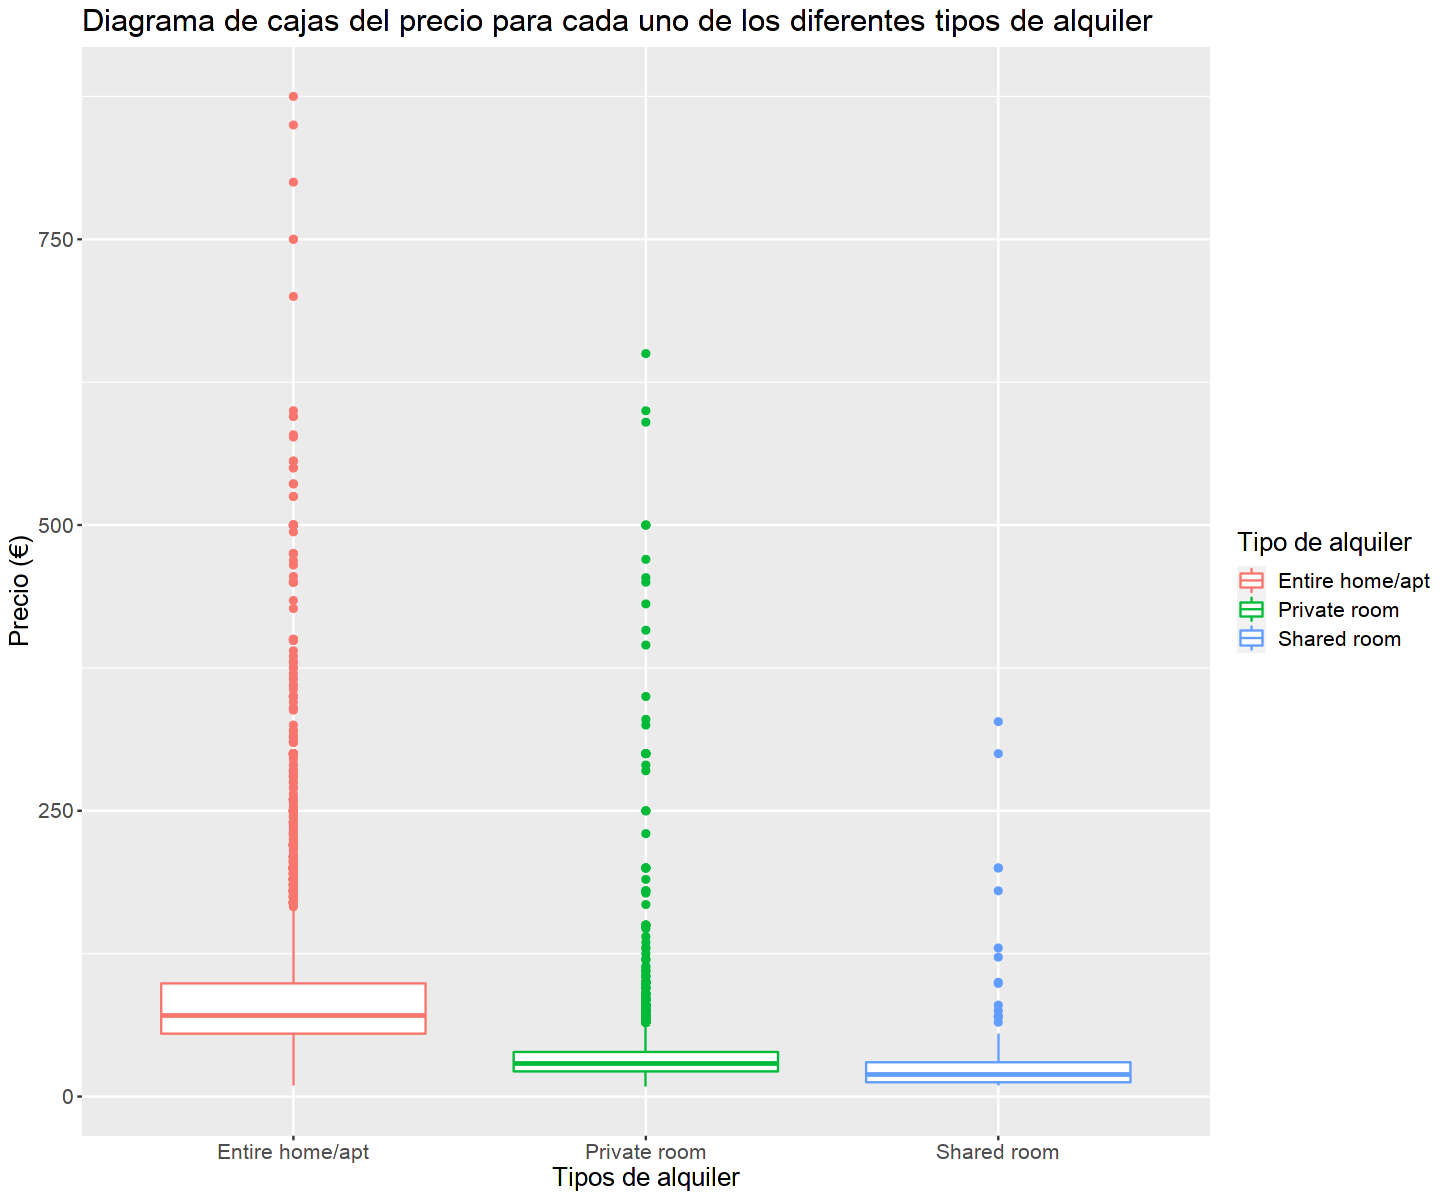

In [16]:
options(repr.plot.height=10,repr.plot.width=12)
ggplot(data = airbnb, aes(x = TipoAlquiler, y = Precio, color = TipoAlquiler))+ geom_boxplot() +
scale_color_discrete(name = "Tipo de alquiler") + theme(tex = element_text(size = 15)) +
ggtitle("Diagrama de cajas del precio para cada uno de los diferentes tipos de alquiler")+
labs(x = "Tipos de alquiler", y = "Precio (€)")


Cual es el precio medio de alquiler medio de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [17]:
for (i in levels(airbnb$TipoAlquiler)){
    precioMedio<-mean(airbnb$Precio[airbnb$TipoAlquiler==i],na.rm=T)
    print(paste("El precio medio para el tipo de alquiler",i,"es",round(precioMedio,2),"€"))
}

print("Ahora lo analizamos estadísticamente.")
print("Para ello aplicamos el test de Shapiro y así vemos si nuestros datos tienen una distribución Gaussiana")


muestreoParaShapiro<-airbnb[sample(1:nrow(airbnb),8000),]
#en los tipos de alquiler 'Entire' y 'Private' hay más de 5000 muestras así que la función shapiro.test no puede calcularlo
#en estos casos cogemos una muestra del dataframe original donde para cada tipo de alquiler no superemos las 5000 muestras. 

for(i in levels(airbnb$TipoAlquiler)){
    print(paste(i,": tomamos",length(muestreoParaShapiro$Precio[muestreoParaShapiro$TipoAlquiler==i]),
          "muestras, y su p-valor es", shapiro.test(muestreoParaShapiro$Precio[muestreoParaShapiro$TipoAlquiler==i])$p.value))
}

print("En todos los casos obtenemos un p-valor muy bajo, por lo que rechazamos la hipótesis nula y") 
print("podemos decir que nuestros datos no siguen una distribución Gaussiana.")
print("Por tanto, para comparar la media de nuestras 3 variables hay que usar el test de Kruskal-Wallis.")

kruskal.test( airbnb$Precio ~ airbnb$TipoAlquiler, data = airbnb)

print("Obtenemos un p-valor muy bajo, por lo que se rechaza la hipótesis nula y podemos decir que ")
print("no todas las medias son iguales")

[1] "El precio medio para el tipo de alquiler Entire home/apt es 87.3 €"
[1] "El precio medio para el tipo de alquiler Private room es 34.26 €"
[1] "El precio medio para el tipo de alquiler Shared room es 29.85 €"
[1] "Ahora lo analizamos estadísticamente."
[1] "Para ello aplicamos el test de Shapiro y así vemos si nuestros datos tienen una distribución Gaussiana"
[1] "Entire home/apt : tomamos 4788 muestras, y su p-valor es 5.48192642950252e-73"
[1] "Private room : tomamos 3091 muestras, y su p-valor es 5.62300023778871e-74"
[1] "Shared room : tomamos 121 muestras, y su p-valor es 1.53499135961637e-19"
[1] "En todos los casos obtenemos un p-valor muy bajo, por lo que rechazamos la hipótesis nula y"
[1] "podemos decir que nuestros datos no siguen una distribución Gaussiana."
[1] "Por tanto, para comparar la media de nuestras 3 variables hay que usar el test de Kruskal-Wallis."



	Kruskal-Wallis rank sum test

data:  airbnb$Precio by airbnb$TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


[1] "Obtenemos un p-valor muy bajo, por lo que se rechaza la hipótesis nula y podemos decir que "
[1] "no todas las medias son iguales"


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [18]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler=="Entire home/apt",]
head(airbnb_entire)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [19]:
top5BarriosConMasApartamentos<-sort(table(airbnb_entire$Barrio),decreasing = TRUE)[1:5]
print("Los 5 barrios del dataset con mayor número de apartamentos enteros en alquiler son:")
for (i in 1:5){
    print(paste(i,"-> Barrio:", names(top5BarriosConMasApartamentos)[i],"-> con ", 
                top5BarriosConMasApartamentos[i],"apartamentos."))
}

#sort(table(airbnb_entire$Barrio),decreasing = TRUE)[1:5]

[1] "Los 5 barrios del dataset con mayor número de apartamentos enteros en alquiler son:"
[1] "1 -> Barrio: Embajadores -> con  1228 apartamentos."
[1] "2 -> Barrio: Universidad -> con  984 apartamentos."
[1] "3 -> Barrio: Palacio -> con  769 apartamentos."
[1] "4 -> Barrio: Sol -> con  701 apartamentos."
[1] "5 -> Barrio: Cortes -> con  574 apartamentos."


¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [20]:
barriosPrecioMedio<-aggregate(airbnb_entire$Precio~airbnb_entire$Barrio,airbnb_entire,mean,na.rm=TRUE)
barriosPrecioMedio<-barriosPrecioMedio[order(barriosPrecioMedio[,2],decreasing=TRUE),]
print(paste("Los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros son:"))
barriosPrecioMedio[1:5,]

[1] "Los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros son:"


,airbnb_entire$Barrio,airbnb_entire$Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [21]:
entradasBarrio<-as.data.frame(table(airbnb_entire$Barrio))
nuevoDF<-merge(barriosPrecioMedio, entradasBarrio, by.x="airbnb_entire$Barrio", by.y="Var1")
colnames(nuevoDF)<-c("Barrio","PrecioMedio", "Freq")
nuevoDF <- nuevoDF[order(nuevoDF[,'PrecioMedio'],decreasing = TRUE),]
nuevoDF[1:5,]

,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
77,Palomas,309.7500,4
50,Fuentelareina,180.0000,2
93,Recoletos,161.9254,135
43,El Plantío,150.0000,1
30,Castellana,141.3889,73


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [22]:
#dplyr::filter(nuevoDF, Freq >= 100)
#nuevoDF[nuevoDF$Freq>=100,]
barriosConEntradas<-subset(nuevoDF,Freq>=100)
barriosConEntradasOrdenado<-barriosConEntradas[order(barriosConEntradas[,2],decreasing=TRUE),]
barriosConEntradasOrdenado[1:5,]

,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
93,Recoletos,161.92537,135
52,Goya,111.33803,142
106,Sol,100.75036,701
108,Trafalgar,98.57848,223
59,Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios

Warning message:
“Use of `Recoletos$Precio` is discouraged. Use `Precio` instead.”Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”Warning message:
“Use of `Goya$Precio` is discouraged. Use `Precio` instead.”

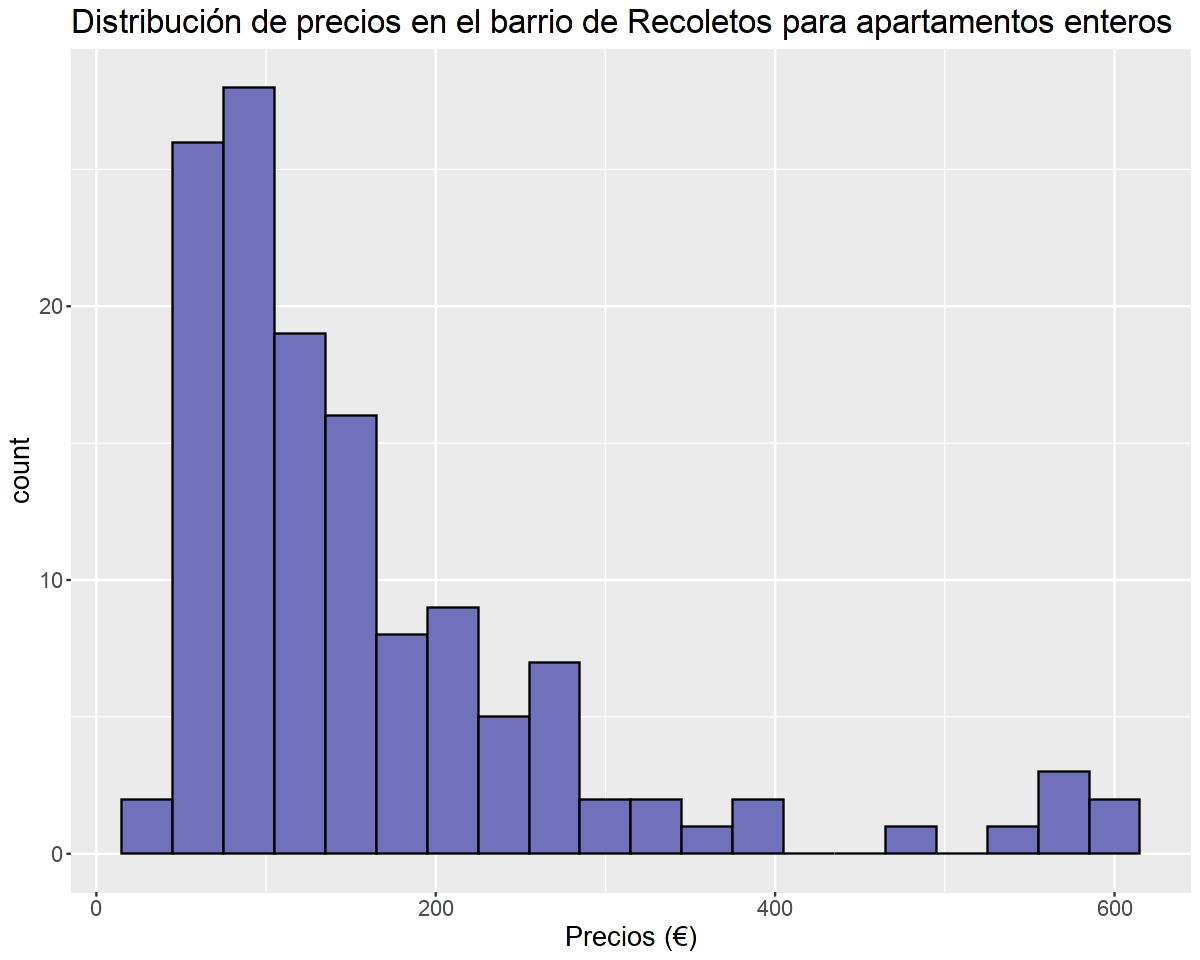

Warning message:
“Use of `Sol$Precio` is discouraged. Use `Precio` instead.”

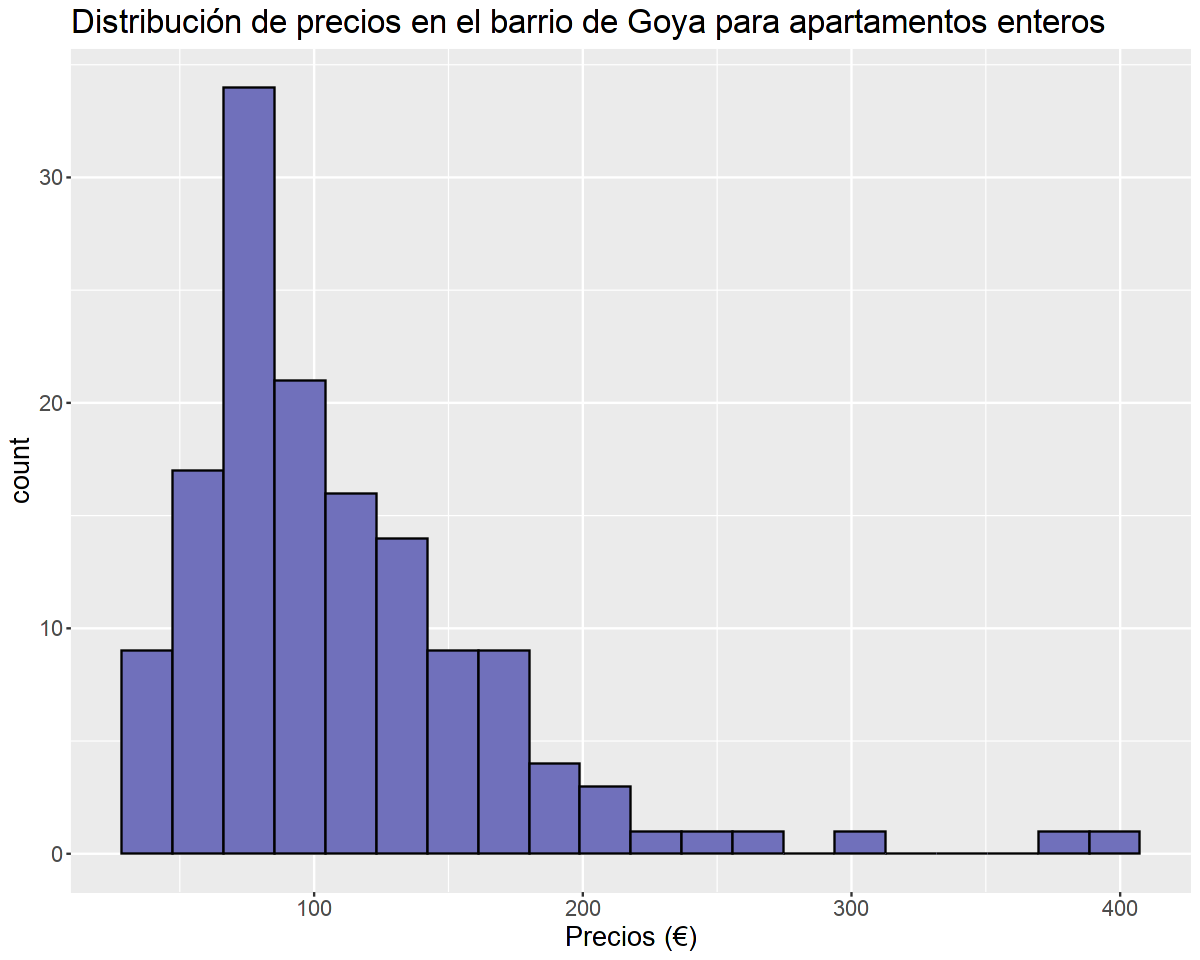

Warning message:
“Use of `Trafalgar$Precio` is discouraged. Use `Precio` instead.”

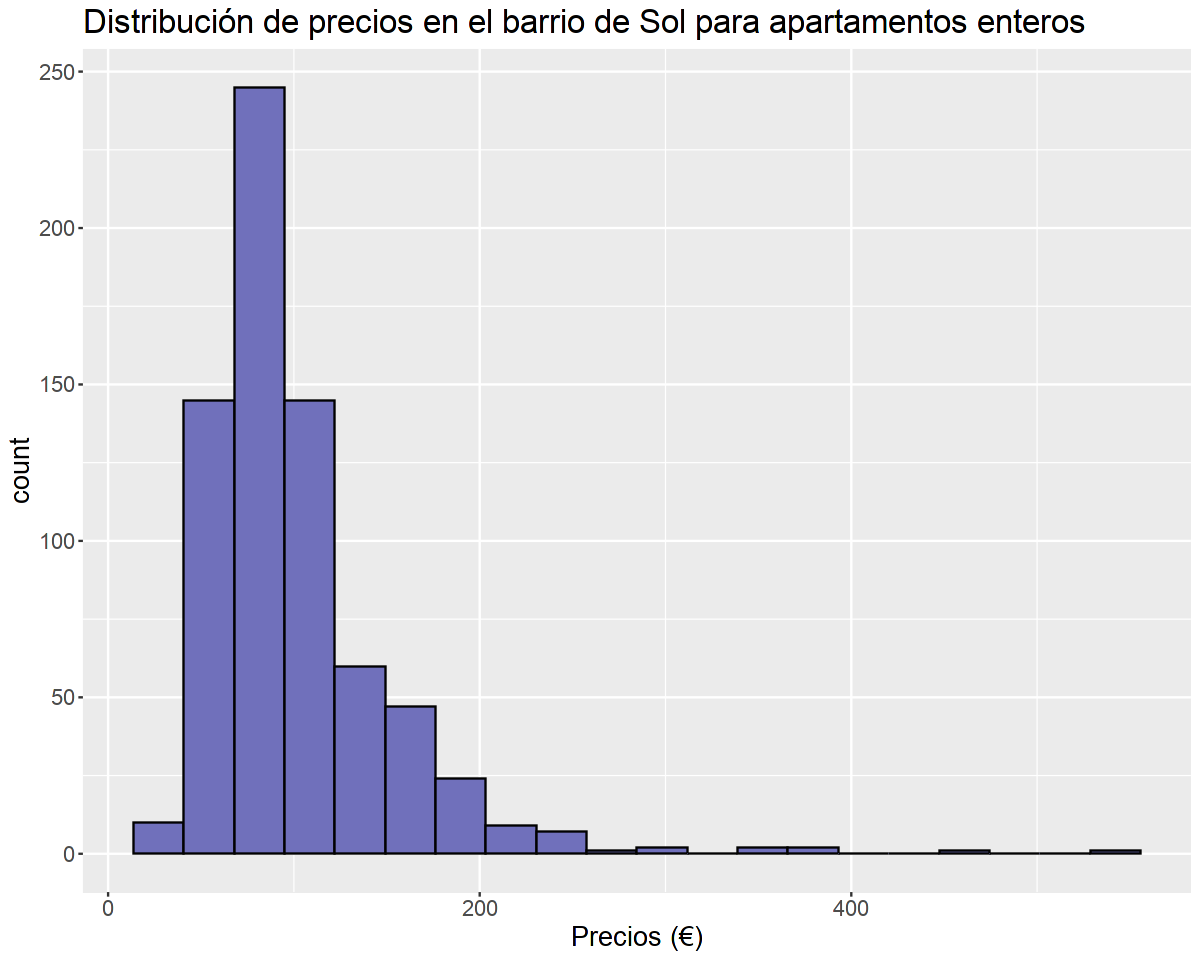

Warning message:
“Use of `Justicia$Precio` is discouraged. Use `Precio` instead.”

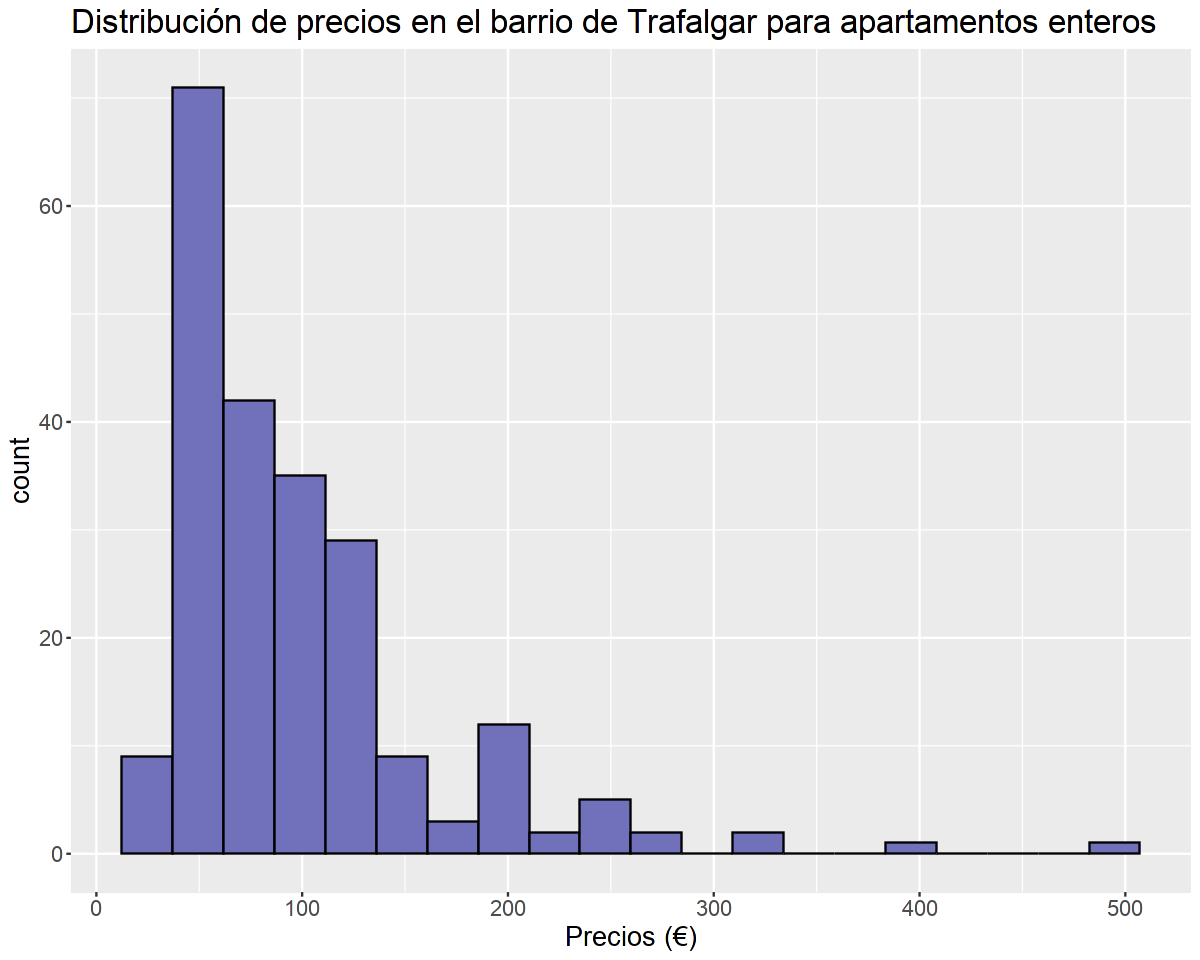

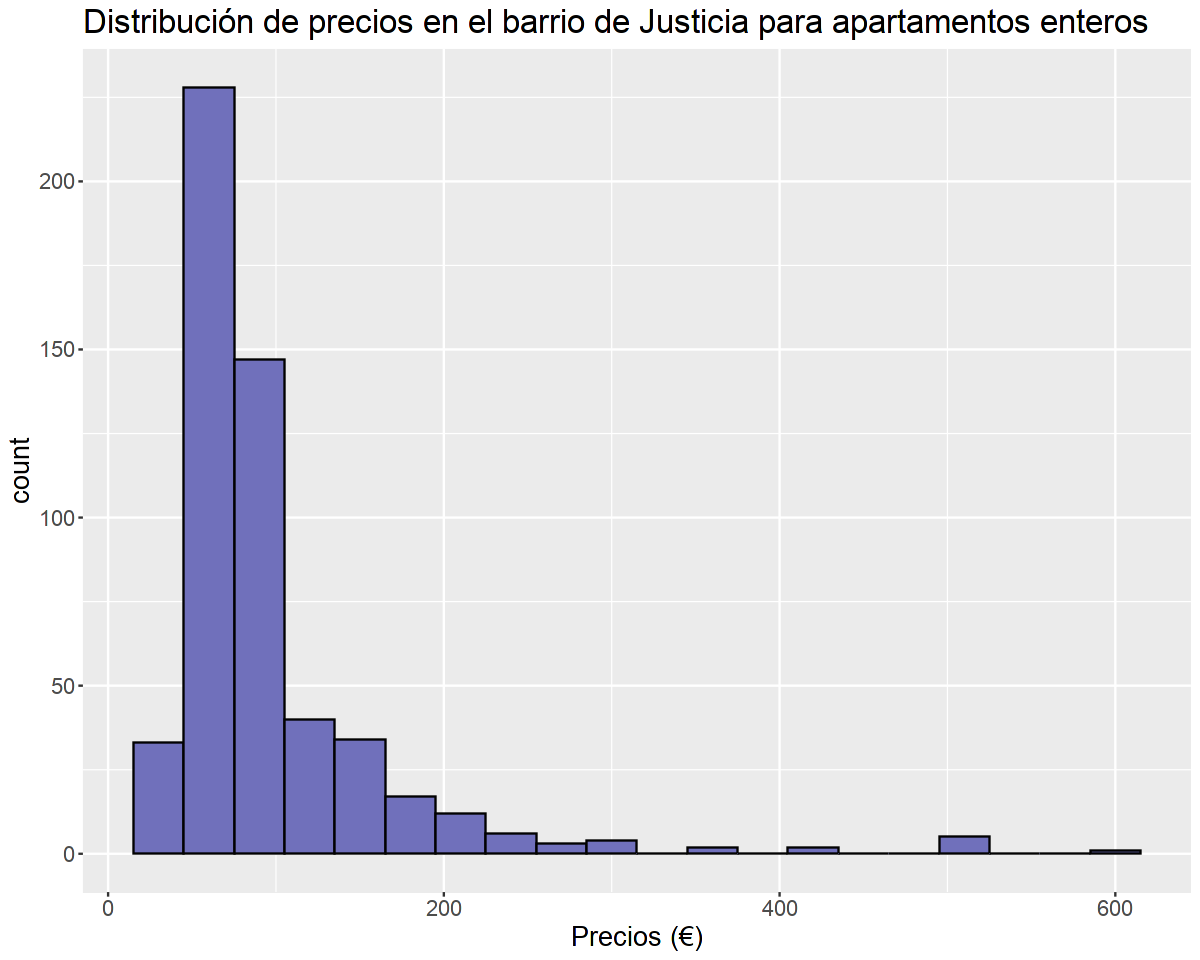

In [23]:
options(repr.plot.height=8,repr.plot.width=10)

Recoletos <- airbnb_entire[airbnb_entire$Barrio=="Recoletos", ]
ggplot(data=Recoletos,aes(x=Recoletos$Precio))+
    geom_histogram(bins=20,fill='#7070BB',color="#010101")+
    theme(tex=element_text(size=16))+
    labs(x="Precios (€)", title= "Distribución de precios en el barrio de Recoletos para apartamentos enteros")

Goya <- airbnb_entire[airbnb_entire$Barrio=="Goya", ]
ggplot(data=Goya,aes(x=Goya$Precio))+
    geom_histogram(bins=20,fill='#7070BB',color="#010101")+
    theme(tex=element_text(size=16))+
    labs(x="Precios (€)", title= "Distribución de precios en el barrio de Goya para apartamentos enteros")

Sol <- airbnb_entire[airbnb_entire$Barrio=="Sol", ]
ggplot(data=Sol,aes(x=Sol$Precio))+
    geom_histogram(bins=20,fill='#7070BB',color="#010101")+
    theme(tex=element_text(size=16))+
    labs(x="Precios (€)", title= "Distribución de precios en el barrio de Sol para apartamentos enteros")

Trafalgar <- airbnb_entire[airbnb_entire$Barrio=="Trafalgar", ]
ggplot(data=Trafalgar,aes(x=Trafalgar$Precio))+
    geom_histogram(bins=20,fill='#7070BB',color="#010101")+
    theme(tex=element_text(size=16))+
    labs(x="Precios (€)", title= "Distribución de precios en el barrio de Trafalgar para apartamentos enteros")

Justicia <- airbnb_entire[airbnb_entire$Barrio=="Justicia", ]
ggplot(data=Justicia,aes(x=Justicia$Precio))+
    geom_histogram(bins=20,fill='#7070BB',color="#010101")+
    theme(tex=element_text(size=16))+
    labs(x="Precios (€)", title= "Distribución de precios en el barrio de Justicia para apartamentos enteros")
    


## <font color='red'>**Comentarios**</font>

Realmente era más fácil, se podía pintar todo en una misma gráfica. Estaba pidiendo la función de densidad estimada que en ggplot se calcula con geom_density.

Al usar aes() no tienes que pasarle el nombre del dataframe, ya se lo estás pasando a la función ggplot. Deberías reemplazar esto:

`ggplot(data=Justicia,aes(x=Justicia$Precio))+` 

por esto:

`ggplot(data=Justicia,aes(x=Precio))+` 


Warning message:
“Removed 1 rows containing non-finite values (stat_density).”

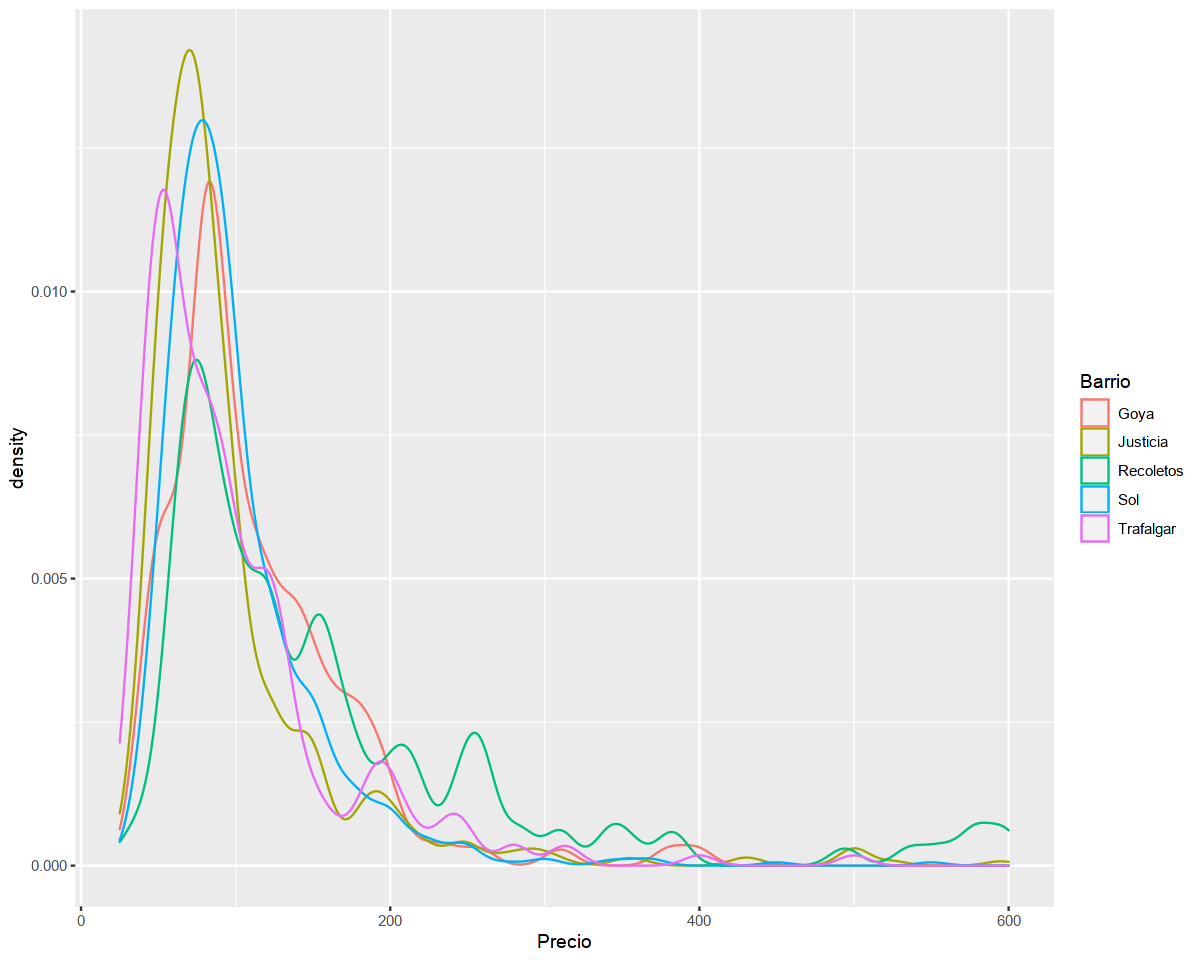

In [24]:
barrios<-c("Recoletos","Goya","Sol","Trafalgar","Justicia")

top_barrios<-subset(airbnb_entire,Barrio %in% barrios)
ggplot(top_barrios,aes(x=Precio,color=Barrio))+geom_density(bw=10)


Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [25]:
top5Barrios <- airbnb_entire[airbnb_entire$Barrio=="Recoletos" | airbnb_entire$Barrio=="Goya" |
                      airbnb_entire$Barrio=="Sol" | airbnb_entire$Barrio=="Trafalgar" |
                      airbnb_entire$Barrio=="Justicia", ]
top5Barrios$Barrio<-droplevels(top5Barrios$Barrio)
                               
barriosTamanyoMedio<-aggregate(top5Barrios$MetrosCuadrados~top5Barrios$Barrio,top5Barrios,mean,na.rm=TRUE)
DFcompleto<-merge(barriosConEntradas, barriosTamanyoMedio, by.x="Barrio", by.y="top5Barrios$Barrio")
colnames(DFcompleto)<-c("Barrio","PrecioMedio", "Freq", "TamañoMedio")
DFcompleto


Barrio,PrecioMedio,Freq,TamañoMedio
<fct>,<dbl>,<int>,<dbl>
Goya,111.33803,142,51.68504
Justicia,98.25468,534,28.52669
Recoletos,161.92537,135,26.66316
Sol,100.75036,701,45.61692
Trafalgar,98.57848,223,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos

Warning message:
“Use of `Recoletos$MetrosCuadrados` is discouraged. Use `MetrosCuadrados` instead.”Warning message:
“Removed 132 rows containing non-finite values (stat_bin).”Warning message:
“Use of `Goya$MetrosCuadrados` is discouraged. Use `MetrosCuadrados` instead.”Warning message:
“Removed 139 rows containing non-finite values (stat_bin).”

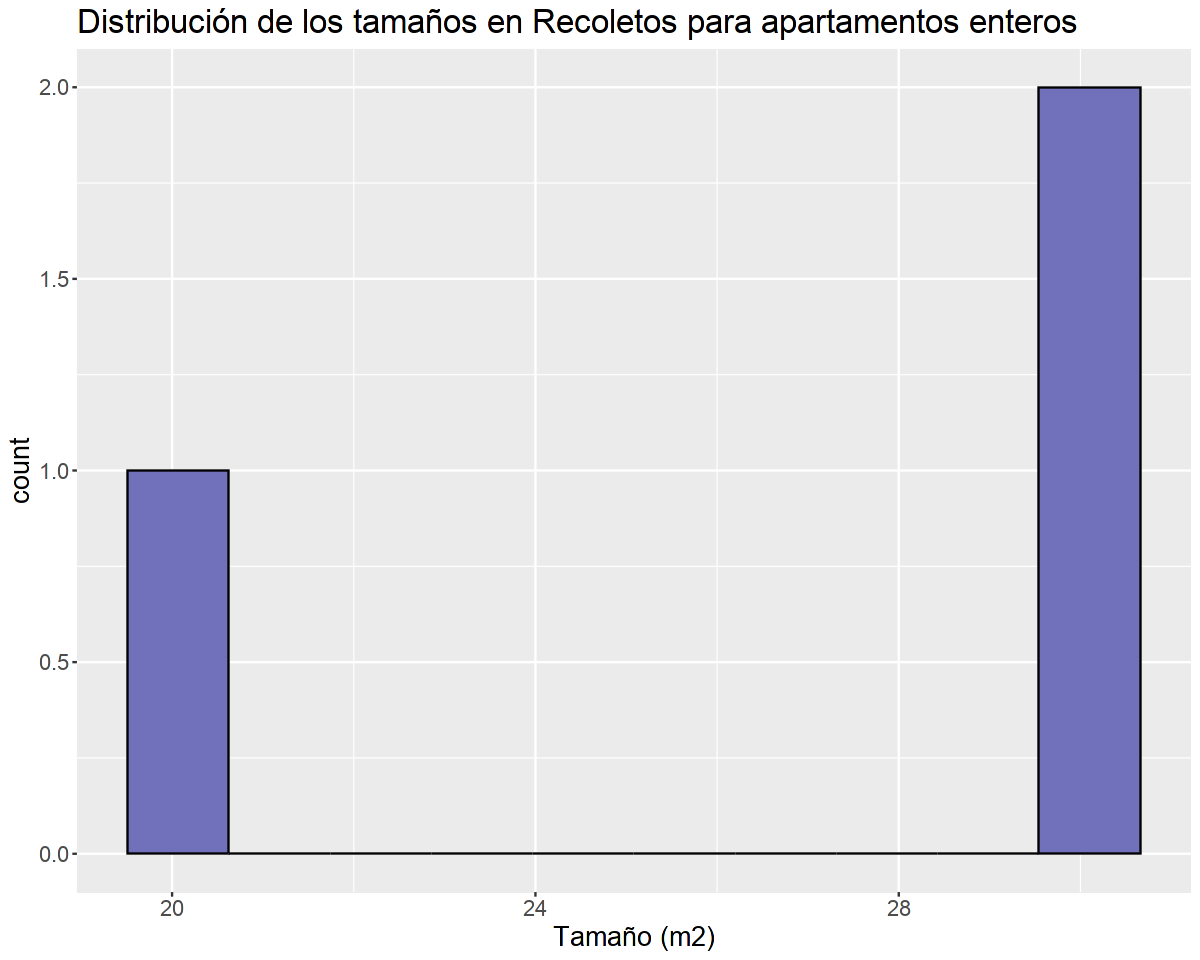

Warning message:
“Use of `Sol$MetrosCuadrados` is discouraged. Use `MetrosCuadrados` instead.”Warning message:
“Removed 641 rows containing non-finite values (stat_bin).”

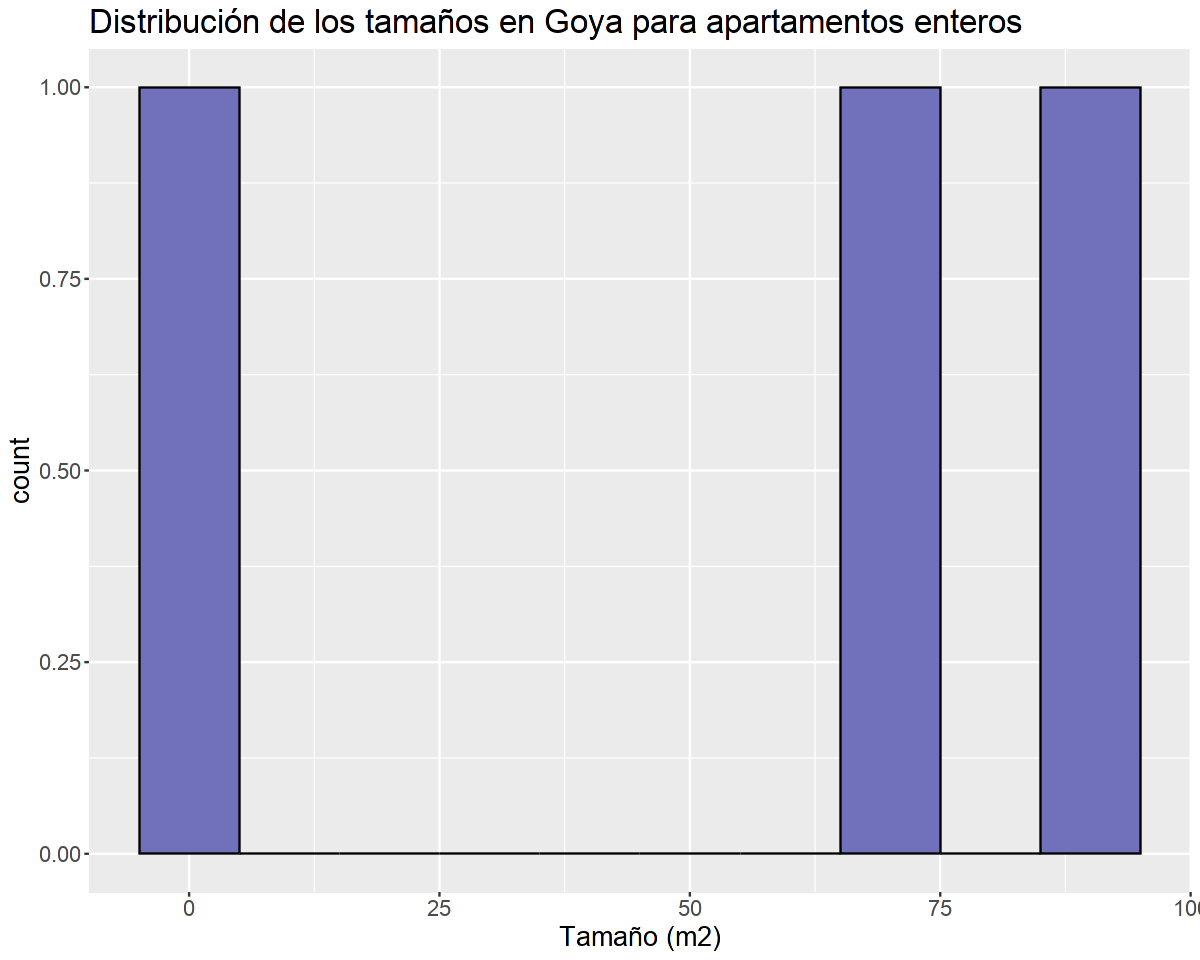

Warning message:
“Use of `Trafalgar$MetrosCuadrados` is discouraged. Use `MetrosCuadrados` instead.”Warning message:
“Removed 216 rows containing non-finite values (stat_bin).”

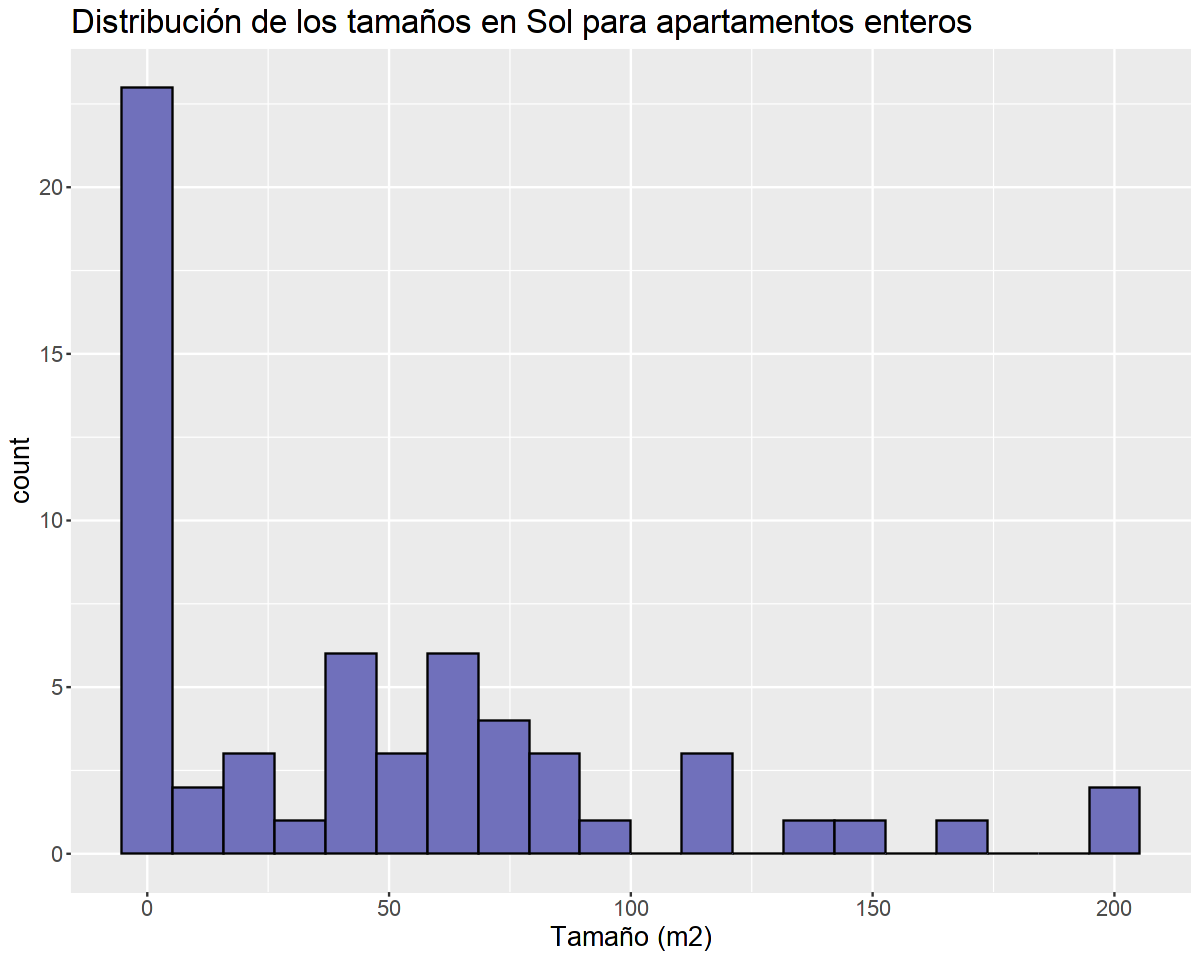

Warning message:
“Use of `Justicia$MetrosCuadrados` is discouraged. Use `MetrosCuadrados` instead.”Warning message:
“Removed 517 rows containing non-finite values (stat_bin).”

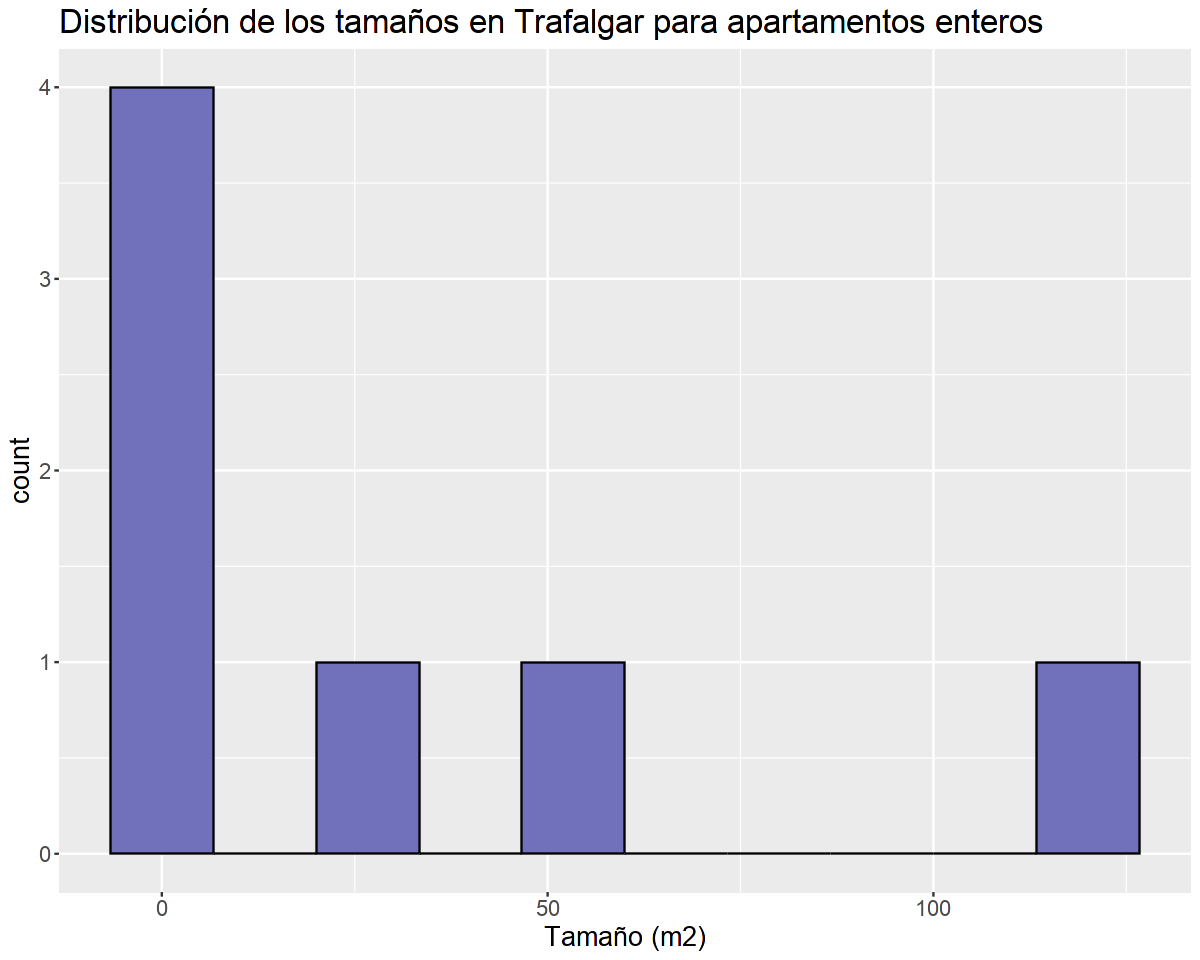

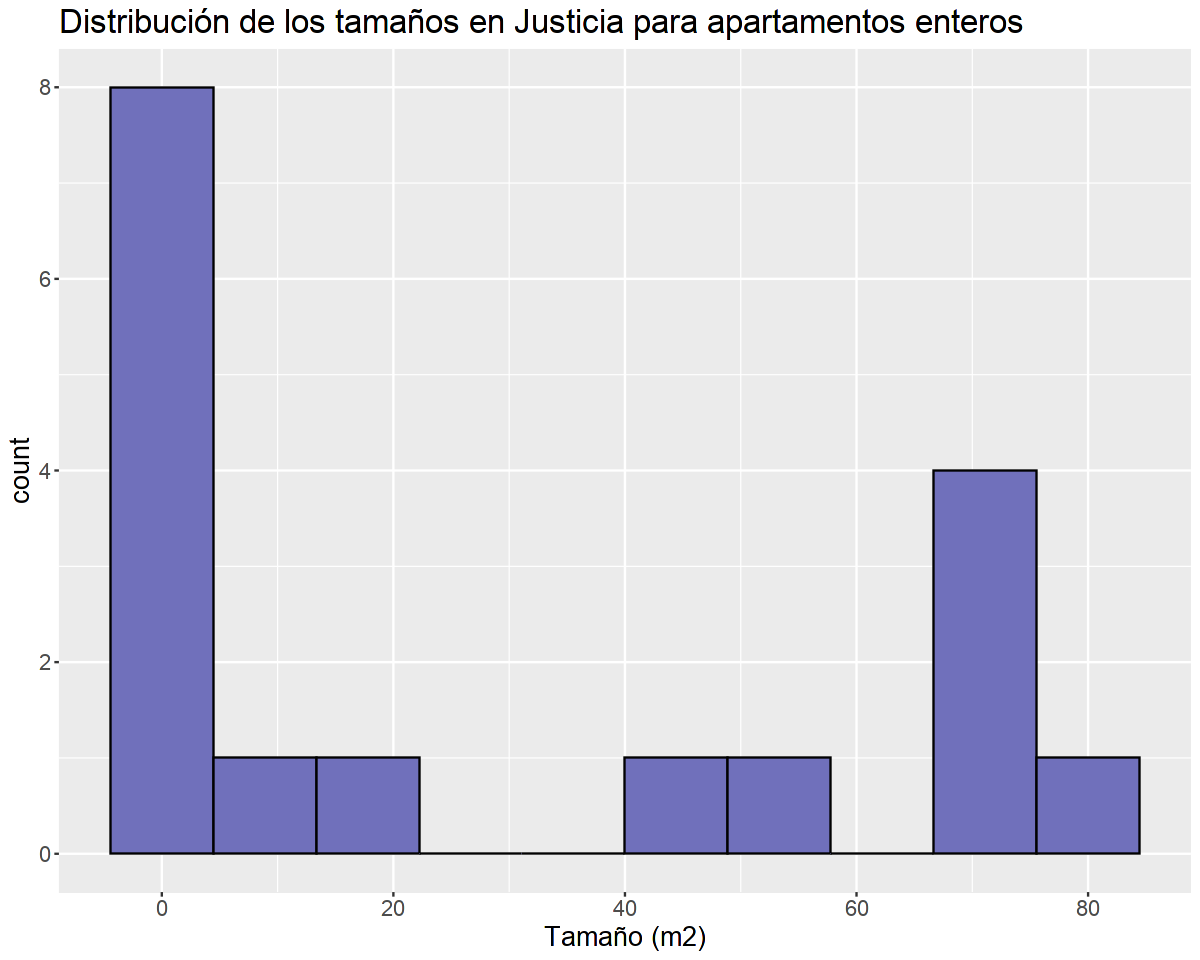

In [26]:
ggplot(data=Recoletos,aes(x=Recoletos$MetrosCuadrados))+
    geom_histogram(bins=10,fill='#7070BB',color="#010101")+
    theme(tex=element_text(size=16))+
    labs(x="Tamaño (m2)", title= "Distribución de los tamaños en Recoletos para apartamentos enteros")

ggplot(data=Goya,aes(x=Goya$MetrosCuadrados))+
    geom_histogram(bins=10,fill='#7070BB',color="#010101")+
    theme(tex=element_text(size=16))+
    labs(x="Tamaño (m2)", title= "Distribución de los tamaños en Goya para apartamentos enteros")

ggplot(data=Sol,aes(x=Sol$MetrosCuadrados))+
    geom_histogram(bins=20,fill='#7070BB',color="#010101")+
    theme(tex=element_text(size=16))+
    labs(x="Tamaño (m2)", title= "Distribución de los tamaños en Sol para apartamentos enteros")

ggplot(data=Trafalgar,aes(x=Trafalgar$MetrosCuadrados))+
    geom_histogram(bins=10,fill='#7070BB',color="#010101")+
    theme(tex=element_text(size=16))+
    labs(x="Tamaño (m2)", title= "Distribución de los tamaños en Trafalgar para apartamentos enteros")

ggplot(data=Justicia,aes(x=Justicia$MetrosCuadrados))+
    geom_histogram(bins=10,fill='#7070BB',color="#010101")+
    theme(tex=element_text(size=16))+
    labs(x="Tamaño (m2)", title= "Distribución de los tamaños en Justicia para apartamentos enteros")

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [27]:
print("Vamos a analizarlo estadísticamente y para ello aplicamos el test de Shapiro,")
print("queremos ver si nuestros datos tienen una distribución Gaussiana:")

for(i in levels(top5Barrios$Barrio)){
    print(paste(i,": su p-valor es",
                shapiro.test(top5Barrios$MetrosCuadrados[top5Barrios$Barrio==i])$p.value))
}

print("En la mayoría de los casos obtenemos un p-valor muy bajo(<0.05), y en esos rechazamos la hipótesis nula,") 
print("es decir, podemos afirmar que no siguen una distribución Gaussiana.")
print("Por tanto, para comparar la media de nuestras 5 variables hay que usar el test de Kruskal-Wallis.")

kruskal.test(top5Barrios$MetrosCuadrados ~ top5Barrios$Barrio, data=top5Barrios)

print("Obtenemos un p-valor bastante alto, y por tanto no podemos rechazar la hipótesis nula.")
print("Es decir, estadísticamente no podemos decir que los 5 barrios no tienen un tamaño medio igual.")

[1] "Vamos a analizarlo estadísticamente y para ello aplicamos el test de Shapiro,"
[1] "queremos ver si nuestros datos tienen una distribución Gaussiana:"
[1] "Goya : su p-valor es 0.519924091564745"
[1] "Justicia : su p-valor es 0.00064192630271212"
[1] "Recoletos : su p-valor es 0"
[1] "Sol : su p-valor es 8.6913775134728e-07"
[1] "Trafalgar : su p-valor es 0.0127581397426826"
[1] "En la mayoría de los casos obtenemos un p-valor muy bajo(<0.05), y en esos rechazamos la hipótesis nula,"
[1] "es decir, podemos afirmar que no siguen una distribución Gaussiana."
[1] "Por tanto, para comparar la media de nuestras 5 variables hay que usar el test de Kruskal-Wallis."



	Kruskal-Wallis rank sum test

data:  top5Barrios$MetrosCuadrados by top5Barrios$Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


[1] "Obtenemos un p-valor bastante alto, y por tanto no podemos rechazar la hipótesis nula."
[1] "Es decir, estadísticamente no podemos decir que los 5 barrios no tienen un tamaño medio igual."


## <font color='red'>**Comentarios**</font>

Correcto, pero un apunte al igual que en ggplot no tienes que pasar el nombre entero.

`kruskal.test(top5Barrios$MetrosCuadrados ~ top5Barrios$Barrio, data=top5Barrios)`

deberías reemplazarlo por:

`kruskal.test(MetrosCuadrados ~ Barrio, data=top5Barrios)`


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [28]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
model1 <- lm(data=barrio_sol, formula=NumDormitorios~MaxOcupantes)
summary(model1)


Call:
lm(formula = NumDormitorios ~ MaxOcupantes, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1810 -0.2048  0.0511  0.4231  4.3309 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.28326    0.06119  -4.629 4.38e-06 ***
MaxOcupantes  0.37202    0.01205  30.865  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6561 on 699 degrees of freedom
Multiple R-squared:  0.5768,	Adjusted R-squared:  0.5762 
F-statistic: 952.6 on 1 and 699 DF,  p-value: < 2.2e-16


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [29]:
print("Seleccionamos las variables que queremos analizar y calculamos la matriz de correlación:")
datosEstudiar <- barrio_sol[,c("MaxOcupantes","NumBanyos","NumDormitorios","MetrosCuadrados")]
cor(datosEstudiar, use="pairwise.complete.obs")

[1] "Seleccionamos las variables que queremos analizar y calculamos la matriz de correlación:"


,MaxOcupantes,NumBanyos,NumDormitorios,MetrosCuadrados
MaxOcupantes,1.0000000,0.6578162,0.7594598,0.4286233
NumBanyos,0.6578162,1.0000000,0.6761906,0.4820549
NumDormitorios,0.7594598,0.6761906,1.0000000,0.5684521
MetrosCuadrados,0.4286233,0.4820549,0.5684521,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


[1] "Dibujamos el histograma del tamaño de los apartamentos en el barrio de Sol:"


Warning message:
“Use of `barrio_sol$MetrosCuadrados` is discouraged. Use `MetrosCuadrados` instead.”Warning message:
“Removed 641 rows containing non-finite values (stat_bin).”

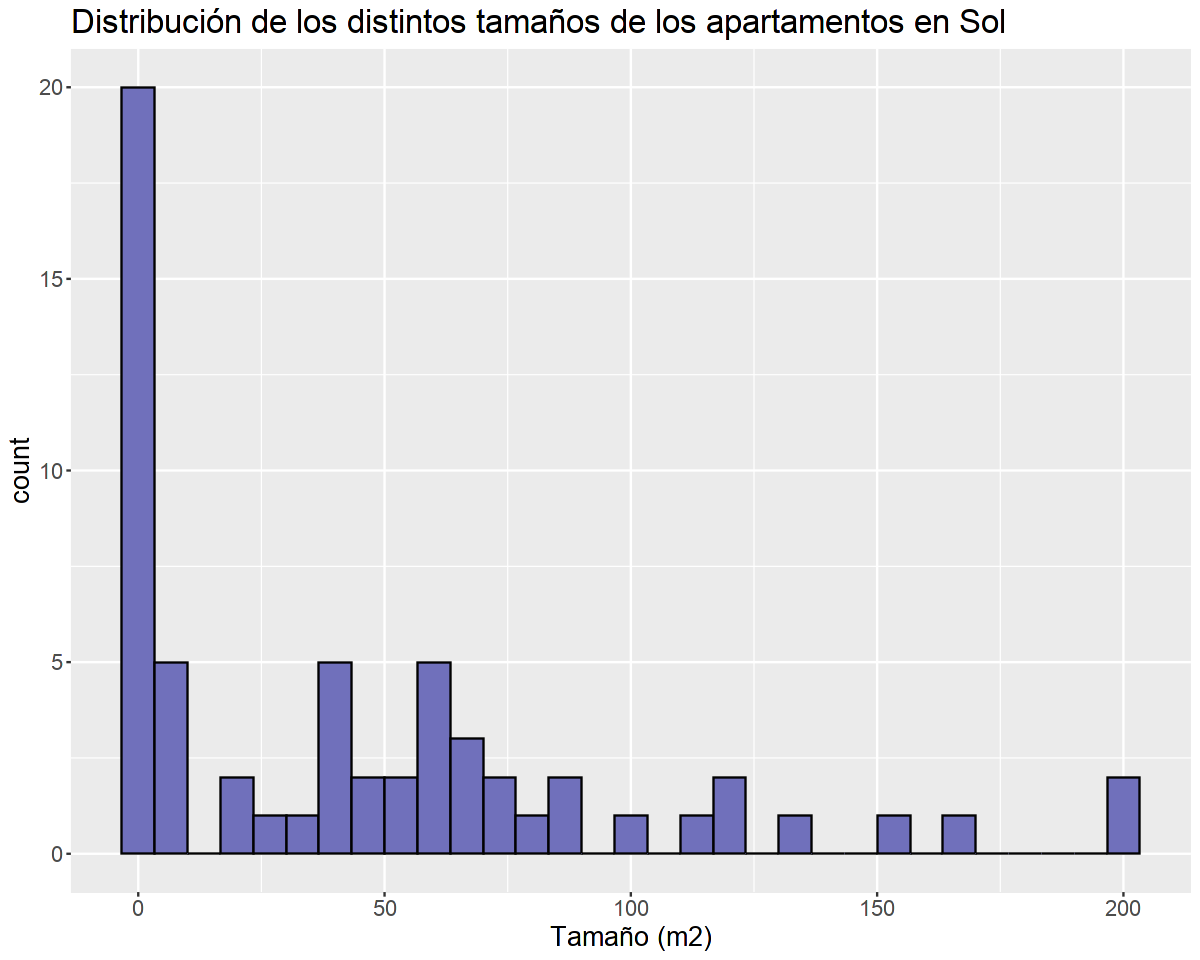

In [30]:
print("Dibujamos el histograma del tamaño de los apartamentos en el barrio de Sol:")

ggplot(data=barrio_sol,aes(x=barrio_sol$MetrosCuadrados))+
    geom_histogram(bins=length(table(barrio_sol$MetrosCuadrados)),fill='#7070BB',color="#010101")+
    theme(tex=element_text(size=16))+
    labs(x="Tamaño (m2)", title= "Distribución de los distintos tamaños de los apartamentos en Sol")

In [31]:
print("Vemos que hay muchas entradas con tamaño = 0, lo cual no tiene sentido.")
print("En nuestro caso vamos a tomar un tamaño mínimo de 10 m2.")

barrio_sol_modificado <- subset (barrio_sol,MetrosCuadrados>=10)

print("Con estos datos limpiados, la nueva matriz de correlación es la siguiente:")
datosEstudiar_modificado <- barrio_sol_modificado[,c("MaxOcupantes","NumBanyos","NumDormitorios","MetrosCuadrados")]
cor(datosEstudiar_modificado, use="pairwise.complete.obs")

print(paste("vemos que la correlación entre NumDormitorios y MetrosCuadrados pasa de",
    round(cor(barrio_sol$NumDormitorios,barrio_sol$MetrosCuadrados, use="pairwise.complete.obs"),4),
    "a", round(cor(barrio_sol_modificado$NumDormitorios,barrio_sol_modificado$MetrosCuadrados, use="pairwise.complete.obs"),4)))

[1] "Vemos que hay muchas entradas con tamaño = 0, lo cual no tiene sentido."
[1] "En nuestro caso vamos a tomar un tamaño mínimo de 10 m2."
[1] "Con estos datos limpiados, la nueva matriz de correlación es la siguiente:"


,MaxOcupantes,NumBanyos,NumDormitorios,MetrosCuadrados
MaxOcupantes,1.0000000,0.8589205,0.7855310,0.7121088
NumBanyos,0.8589205,1.0000000,0.7292599,0.6113095
NumDormitorios,0.7855310,0.7292599,1.0000000,0.8215065
MetrosCuadrados,0.7121088,0.6113095,0.8215065,1.0000000


[1] "vemos que la correlación entre NumDormitorios y MetrosCuadrados pasa de 0.5685 a 0.8215"


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [32]:
modelCompleto<-lm(data=barrio_sol_modificado, formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + MetrosCuadrados)
summary(modelCompleto)

print("Atendiendo a los resultados vemos que el NumDormitorios es la variable que mejor nos permite obtener el precio.")

modelPrecio_NumDormitorios <- lm(data=barrio_sol_modificado, formula=Precio~NumDormitorios)
summary(modelPrecio_NumDormitorios)

print("El valor de los coeficientes son estos:")
modelPrecio_NumDormitorios$coefficients
print("Por tanto, podemos concluir que el Precio estimado (P') y el NumDormitorios (ND) están relacionados así:")
print(paste("P' =", round(modelPrecio_NumDormitorios$coefficients[2],2), "* ND +", 
            round(modelPrecio_NumDormitorios$coefficients[1],2)))


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol_modificado)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.852 -13.673  -5.048  18.523  69.473 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      28.0362    12.9584   2.164  0.03859 * 
NumBanyos         0.5647    14.6038   0.039  0.96941   
NumDormitorios   28.2119     8.5440   3.302  0.00249 **
MaxOcupantes      2.6738     4.4329   0.603  0.55093   
MetrosCuadrados   0.2237     0.2050   1.091  0.28393   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.32 on 30 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7267 
F-statistic:  23.6 on 4 and 30 DF,  p-value: 6.728e-09


[1] "Atendiendo a los resultados vemos que el NumDormitorios es la variable que mejor nos permite obtener el precio."



Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol_modificado)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.704 -17.010  -5.768  19.490  61.296 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.283      8.554   4.826 3.08e-05 ***
NumDormitorios   39.484      4.078   9.682 3.61e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.03 on 33 degrees of freedom
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7317 
F-statistic: 93.75 on 1 and 33 DF,  p-value: 3.611e-11


[1] "El valor de los coeficientes son estos:"


(Intercept) NumDormitorios 
      41.28332       39.48421

[1] "Por tanto, podemos concluir que el Precio estimado (P') y el NumDormitorios (ND) están relacionados así:"
[1] "P' = 39.48 * ND + 41.28"


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [33]:
print("Vamos a calcular las regresiones lineales y así podemos comparar:")

modelPrecio_MetrosCuadrados <- lm(data=barrio_sol_modificado, formula=Precio~MetrosCuadrados)

summary(modelPrecio_NumDormitorios)
summary(modelPrecio_MetrosCuadrados)

print("Atendiendo a los resultados, el número de habitaciones es más fiable que los metros cuadrados.")
print("Los coeficientes tienen mayor confianza (número de *) ya que el p-valor es menor y el R-cuadrado es superior.")

[1] "Vamos a calcular las regresiones lineales y así podemos comparar:"



Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_sol_modificado)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.704 -17.010  -5.768  19.490  61.296 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.283      8.554   4.826 3.08e-05 ***
NumDormitorios   39.484      4.078   9.682 3.61e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.03 on 33 degrees of freedom
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7317 
F-statistic: 93.75 on 1 and 33 DF,  p-value: 3.611e-11



Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_sol_modificado)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.154 -18.405  -0.139   9.146 122.102 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.9151    12.6752   2.439   0.0203 *  
MetrosCuadrados   0.9796     0.1404   6.978  5.6e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.65 on 33 degrees of freedom
Multiple R-squared:  0.5961,	Adjusted R-squared:  0.5838 
F-statistic:  48.7 on 1 and 33 DF,  p-value: 5.596e-08


[1] "Atendiendo a los resultados, el número de habitaciones es más fiable que los metros cuadrados."
[1] "Los coeficientes tienen mayor confianza (número de *) ya que el p-valor es menor y el R-cuadrado es superior."


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

[1] "Con cada metro cuadrado extra el apartamento incrementa su precio en 0.98 €."
[1] "Si tomamos un margen de error del 95% el límite inferior es 0.69 €."
[1] "Y el límite superior es 1.27 €."


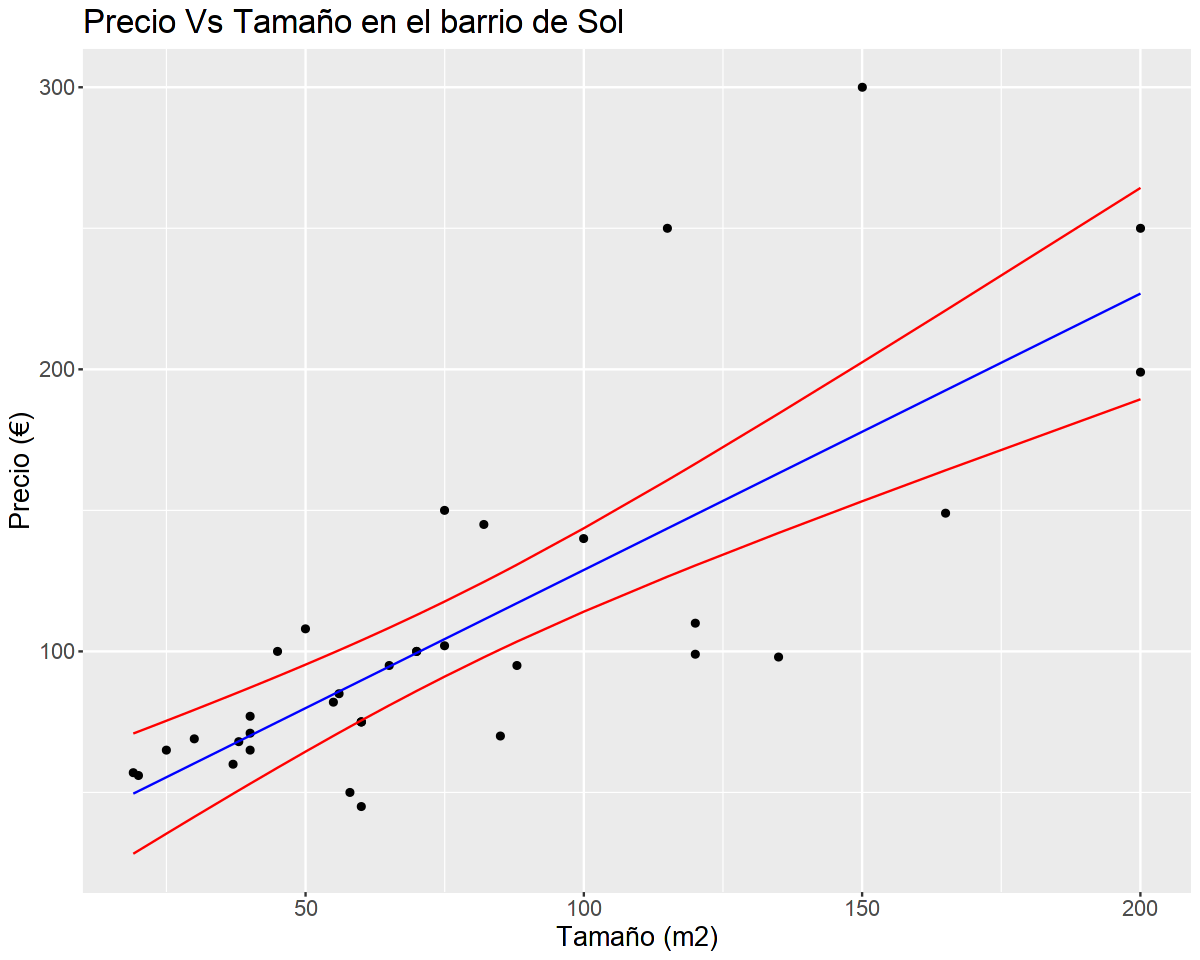

In [34]:
IntervaloConfianza_MetrosCuadrados<-confint(modelPrecio_MetrosCuadrados)

print(paste("Con cada metro cuadrado extra el apartamento incrementa su precio en", 
            round(modelPrecio_MetrosCuadrados$coefficients[2],2),"€."))
print(paste("Si tomamos un margen de error del 95% el límite inferior es", 
            round(IntervaloConfianza_MetrosCuadrados[2,1],2),"€."))
print(paste("Y el límite superior es", round(IntervaloConfianza_MetrosCuadrados[2,2],2),"€."))

barrio_sol_modificado$PrecioPredictedMC <- predict(modelPrecio_MetrosCuadrados, barrio_sol_modificado)
umbrales95MC <- predict(modelPrecio_MetrosCuadrados, barrio_sol_modificado, interval = 'confidence')
barrio_sol_modificado$PrecioPredictedMC_lwr <- umbrales95MC[,"lwr"]
barrio_sol_modificado$PrecioPredictedMC_upr <- umbrales95MC[,"upr"]

ggplot(data=barrio_sol_modificado,aes(x=MetrosCuadrados))+
    geom_point(aes(y=Precio))+
    geom_line(aes(y=PrecioPredictedMC),color="blue")+
    geom_line(aes(y=PrecioPredictedMC_lwr),color="red")+
geom_line(aes(y=PrecioPredictedMC_upr),color="red")+
    theme(tex=element_text(size=16))+xlab("Tamaño (m2)")+ylab("Precio (€)")+
    ggtitle("Precio Vs Tamaño en el barrio de Sol")


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

[1] "Con cada dormitorio el apartamento incrementa su precio en 39.48 €."
[1] "Si tomamos un margen de error del 95% el límite inferior es 31.19 €."
[1] "Y el límite superior es 47.78 €."


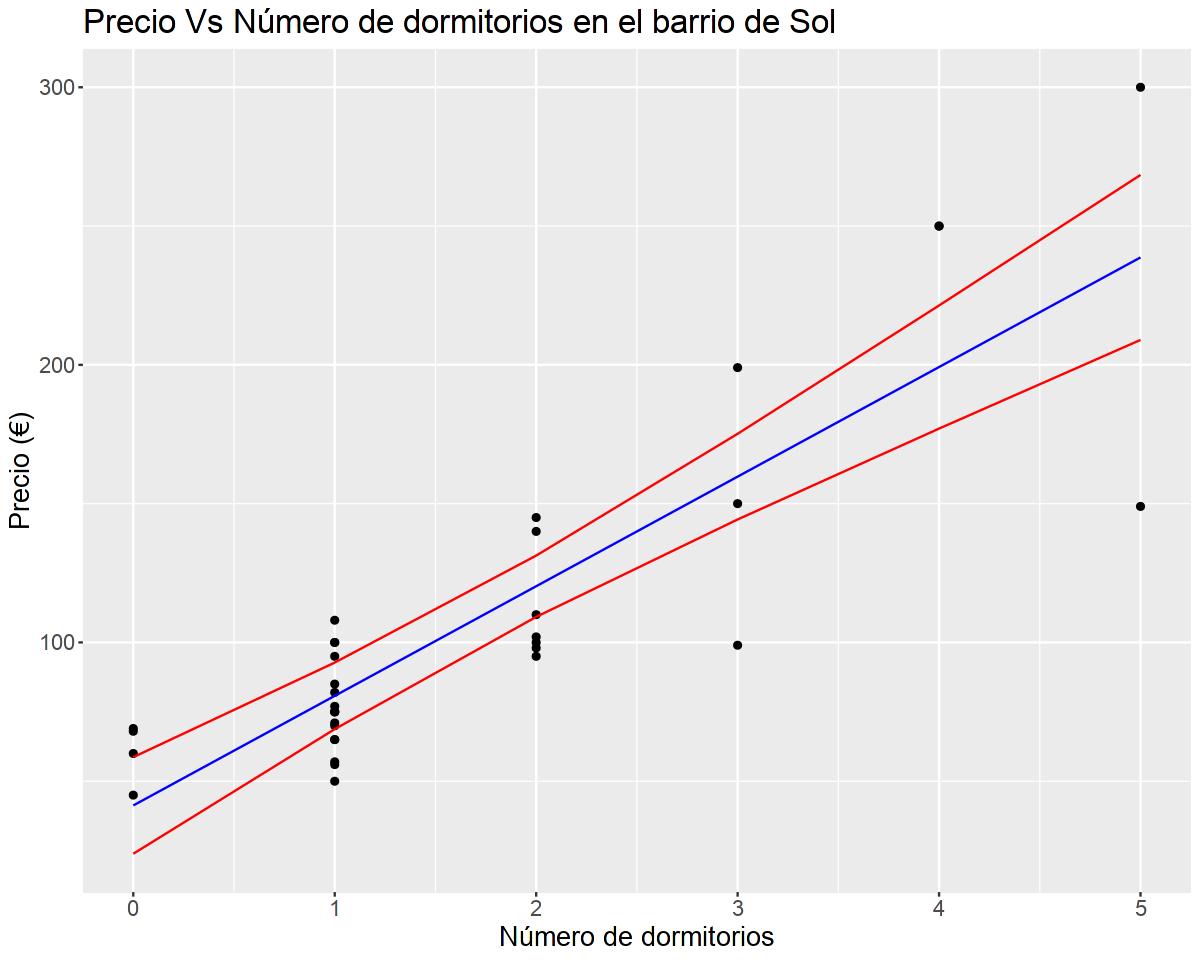

In [35]:
IntervaloConfianza_NumDormitorios<-confint(modelPrecio_NumDormitorios)

print(paste("Con cada dormitorio el apartamento incrementa su precio en", 
            round(modelPrecio_NumDormitorios$coefficients[2],2),"€."))
print(paste("Si tomamos un margen de error del 95% el límite inferior es", 
            round(IntervaloConfianza_NumDormitorios[2,1],2),"€."))
print(paste("Y el límite superior es", round(IntervaloConfianza_NumDormitorios[2,2],2),"€."))

barrio_sol_modificado$PrecioPredictedND <- predict(modelPrecio_NumDormitorios, barrio_sol_modificado)
umbrales95ND <- predict(modelPrecio_NumDormitorios, barrio_sol_modificado, interval = 'confidence')
barrio_sol_modificado$PrecioPredictedND_lwr <- umbrales95ND[,"lwr"]
barrio_sol_modificado$PrecioPredictedND_upr <- umbrales95ND[,"upr"]

ggplot(data=barrio_sol_modificado,aes(x=NumDormitorios))+
    geom_point(aes(y=Precio))+
    geom_line(aes(y=PrecioPredictedND),color="blue")+
    geom_line(aes(y=PrecioPredictedND_lwr),color="red")+
geom_line(aes(y=PrecioPredictedND_upr),color="red")+
    theme(tex=element_text(size=16))+xlab("Número de dormitorios")+ylab("Precio (€)")+
    ggtitle("Precio Vs Número de dormitorios en el barrio de Sol")

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [36]:
apartamentos_sol_3dorm <- length(subset(barrio_sol_modificado, NumDormitorios == 3)$NumDormitorios)
apartamentos_sol_totales <- length(barrio_sol_modificado$NumDormitorios)
prob_apartamento3dorm_sol <- apartamentos_sol_3dorm / apartamentos_sol_totales

#print(paste("La probabilidad de encontrar un apartamento de 3 dormitorios en el barrio de sol es de", round(prob_apartamento3dorm_sol,2)))

binom.test(apartamentos_sol_3dorm, apartamentos_sol_totales)


	Exact binomial test

data:  apartamentos_sol_3dorm and apartamentos_sol_totales
number of successes = 3, number of trials = 35, p-value = 4.177e-07
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.01803764 0.23057502
sample estimates:
probability of success 
            0.08571429 
